In [1]:
import pandas as pd       
import numpy as np

In [2]:
train_ds = pd.read_csv( "sentiment_train", delimiter="\t" )

In [3]:
train_ds.head( 10 )

sentiment                                               text
0          1            The Da Vinci Code book is just awesome.
1          1  this was the first clive cussler i've ever rea...
2          1                   i liked the Da Vinci Code a lot.
3          1                   i liked the Da Vinci Code a lot.
4          1  I liked the Da Vinci Code but it ultimatly did...
5          1  that's not even an exaggeration ) and at midni...
6          1  I loved the Da Vinci Code, but now I want some...
7          1  i thought da vinci code was great, same with k...
8          1      The Da Vinci Code is actually a good movie...
9          1  I thought the Da Vinci Code was a pretty good ...

In [4]:
train_ds.shape

(6918, 2)

In [5]:
from sklearn.feature_extraction.text import CountVectorizer

In [6]:
count_vectorizer = CountVectorizer( max_features = 5000 ) 

In [7]:
feature_vector = count_vectorizer.fit( train_ds.text )
train_ds_features = count_vectorizer.transform( train_ds.text )

In [8]:
features = feature_vector.get_feature_names()

In [9]:
features_counts = np.sum( train_ds_features.toarray(), axis = 0 )

In [10]:
feature_counts = pd.DataFrame( dict( features = features, counts = features_counts ) )

In [11]:
feature_counts.head()

counts features
0       1       00
1       1      007
2       4       10
3       1     10pm
4       1       12

In [12]:
feature_counts.sort( "counts", ascending = False )

counts           features
1864    3306                the
93      2154                and
864     2093              harry
1466    2093             potter
355     2002               code
2009    2001              vinci
442     2001                 da
1272    2000           mountain
259     2000          brokeback
1171    1624               love
1018    1520                 is
2029    1176                was
151     1127            awesome
1252    1094            mission
977     1093         impossible
1132     974               like
1022     901                 it
1916     808                 to
1275     783              movie
1862     719               that
189      608            because
1805     602              sucks
1803     600             sucked
867      578               hate
1725     506                 so
126      473                 as
1289     462                 my
1283     452               much
1334     425                 of
1533     374             really
...      ...                ...
842        1            haircut
841        1               hair
840        1             hahash
839        1       hahahahahaha
838        1           hahahaha
879        1             health
884        1      heartbreaking
928        1             hookup
913        1            hogwash
927        1             hooker
926        1             hooked
924        1           honestly
923        1             honest
921        1         homophobic
920        1         homophobes
918        1               holy
917        1         hollywoord
915        1            holding
910        1         historical
886        1            heather
907        1             hippie
906        1            himself
903        1          hilarious
902        1             highly
899        1  heteronormativity
896        1           hermione
895        1           heresies
891        1              hello
887        1              heavy
2131       1                 µª

[2132 rows x 2 columns]

In [13]:
count_vectorizer = CountVectorizer( stop_words = "english", max_features = 5000 ) 
feature_vector = count_vectorizer.fit( train_ds.text )
train_ds_features = count_vectorizer.transform( train_ds.text )

In [14]:
features = feature_vector.get_feature_names()
features_counts = np.sum( train_ds_features.toarray(), axis = 0 )
feature_counts = pd.DataFrame( dict( features = features, counts = features_counts ) )
feature_counts.sort( "counts", ascending = False )

counts       features
1328    2093         potter
790     2093          harry
314     2002           code
1823    2001          vinci
399     2001             da
1167    2000       mountain
223     2000      brokeback
1074    1624           love
126     1127        awesome
1150    1094        mission
892     1093     impossible
1035     974           like
1169     783          movie
1646     602          sucks
1644     600         sucked
792      578           hate
1393     374         really
1170     366         movies
1637     365         stupid
967      287           just
993      276           know
1643     276           suck
1075     256          loved
1838     254           want
1437     249          right
1713     202          think
444      188     depressing
1269     183         people
1387     181        reading
852      181       horrible
...      ...            ...
754        1           grow
753        1          group
752        1         ground
750        1          grips
749        1           grey
747        1          grand
742        1         gossip
771        1        halfway
772        1           hall
773        1          halle
801        1   headmistress
817        1       hermione
816        1       heresies
814        1          hello
810        1          heavy
809        1        heather
807        1  heartbreaking
806        1   heartbraking
802        1         health
797        1        haunted
775        1          halls
789        1       harrison
788        1         harder
784        1      happiness
783        1       happened
782        1         happen
780        1           hank
779        1        hanging
776        1          hammy
1920       1             µª

[1921 rows x 2 columns]

In [15]:
from sklearn.naive_bayes import GaussianNB 
from sklearn.cross_validation import train_test_split

In [16]:
clf = GaussianNB()

In [17]:
train_X, test_X, train_y, test_y = train_test_split( train_ds_features, train_ds.sentiment, test_size = 0.3, random_state = 42 )

In [18]:
clf.fit( train_X.toarray(), train_y )

GaussianNB()

In [19]:
test_ds_predicted = clf.predict( test_X.toarray() )

In [20]:
from sklearn import metrics

In [21]:
?metrics.confusion_matrix

In [22]:
cm = metrics.confusion_matrix( test_y, test_ds_predicted )

In [23]:
cm

array([[ 809,   64],
       [  19, 1184]])

In [24]:
import matplotlib as plt
import seaborn as sn
%matplotlib inline

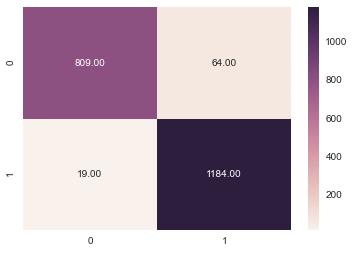

In [25]:
sn.heatmap(cm, annot=True,  fmt='.2f' );

In [26]:
score = metrics.accuracy_score( test_y, test_ds_predicted )

In [27]:
score

0.96001926782273606

In [31]:
# read the entire file into a python array
with open('azhar.json', 'r') as f:
    data = f.readlines()

# remove the trailing "\n" from each line
data = map(lambda x: x.rstrip(), data)

In [32]:
data_json_str = "[" + ','.join(data) + "]"

In [33]:
data_json_str

'[{"created_at":"Fri May 13 08:26:27 +0000 2016","id":731037880219504640,"id_str":"731037880219504640","text":"RT @bookmyshow: 8. Name the city #Azhar is from? #AzharToday @AzharTheFilm","source":"\\u003ca href=\\"http:\\/\\/twitter.com\\/download\\/android\\" rel=\\"nofollow\\"\\u003eTwitter for Android\\u003c\\/a\\u003e","truncated":false,"in_reply_to_status_id":null,"in_reply_to_status_id_str":null,"in_reply_to_user_id":null,"in_reply_to_user_id_str":null,"in_reply_to_screen_name":null,"user":{"id":130861912,"id_str":"130861912","name":"pratik shrungare","screen_name":"Emmii69","location":"nagpur","url":null,"description":"MBA, cricketholic, foodie, Sourav ganguly and Emraan hashmi for lifetime, jobless!!! Belive in kar bhala to ho bhala\\u263a","protected":false,"verified":false,"followers_count":114,"friends_count":750,"listed_count":1,"favourites_count":506,"statuses_count":1237,"created_at":"Thu Apr 08 15:08:31 +0000 2010","utc_offset":19800,"time_zone":"New Delhi","geo_enabled"

In [34]:
azhar_df = pd.read_json(data_json_str)

In [35]:
azhar_df.head( 10 )

contributors coordinates          created_at  \
0           NaN        None 2016-05-13 08:26:27   
1           NaN        None 2016-05-13 08:26:28   
2           NaN        None 2016-05-13 08:26:28   
3           NaN        None 2016-05-13 08:26:28   
4           NaN        None 2016-05-13 08:26:28   
5           NaN        None 2016-05-13 08:26:29   
6           NaN        None 2016-05-13 08:26:29   
7           NaN        None 2016-05-13 08:26:31   
8           NaN        None 2016-05-13 08:26:31   
9           NaN        None 2016-05-13 08:26:31   

                                            entities  \
0  {'user_mentions': [{'screen_name': 'bookmyshow...   
1  {'user_mentions': [{'screen_name': 'bookmyshow...   
2  {'user_mentions': [{'screen_name': 'bookmyshow...   
3  {'user_mentions': [{'screen_name': 'bookmyshow...   
4  {'user_mentions': [{'screen_name': 'bookmyshow...   
5  {'user_mentions': [{'screen_name': 'bookmyshow...   
6  {'user_mentions': [{'screen_name': 'bollywood_...   
7  {'user_mentions': [{'screen_name': 'bookmyshow...   
8  {'user_mentions': [{'screen_name': 'bookmyshow...   
9  {'user_mentions': [{'screen_name': 'taran_adaa...   

                                   extended_entities  favorite_count  \
0                                                NaN               0   
1                                                NaN               0   
2                                                NaN               0   
3                                                NaN               0   
4                                                NaN               0   
5                                                NaN               0   
6  {'media': [{'source_status_id_str': '730953819...               0   
7                                                NaN               0   
8                                                NaN               0   
9                                                NaN               0   

  favorited filter_level   geo                  id  \
0     False          low  None  731037880219504640   
1     False          low  None  731037883612692480   
2     False          low  None  731037884267040768   
3     False          low  None  731037884216643584   
4     False          low  None  731037885286076416   
5     False          low  None  731037888775753728   
6     False          low  None  731037889409122305   
7     False          low  None  731037895830740992   
8     False          low  None  731037896140939264   
9     False          low  None  731037897483276288   

                         ...                          quoted_status_id  \
0                        ...                                       NaN   
1                        ...                                       NaN   
2                        ...                                       NaN   
3                        ...                                       NaN   
4                        ...                                       NaN   
5                        ...                                       NaN   
6                        ...                                       NaN   
7                        ...                                       NaN   
8                        ...                                       NaN   
9                        ...                                       NaN   

  quoted_status_id_str  retweet_count  retweeted  \
0                  NaN              0      False   
1                  NaN              0      False   
2                  NaN              0      False   
3                  NaN              0      False   
4                  NaN              0      False   
5                  NaN              0      False   
6                  NaN              0      False   
7                  NaN              0      False   
8                  NaN              0      False   
9                  NaN              0      False   

                                    retweeted_st

In [36]:
azhar_df = azhar_df[['text']]

In [37]:
azhar_df.head( 10 )

text
0  RT @bookmyshow: 8. Name the city #Azhar is fro...
1  RT @bookmyshow: 3. True Or False: @ItsPrachiDe...
2  @bookmyshow @ItsPrachiDesai @AzharTheFilm #Azh...
3  RT @bookmyshow: 8. Name the city #Azhar is fro...
4  @bookmyshow @AzharTheFilm Q8 Ans : Hyderabad #...
5  RT @bookmyshow: 8. Name the city #Azhar is fro...
6  RT @bollywood_life: @emraanhashmi hits a sixer...
7  RT @bookmyshow: 2. What is the name of #Azhar’...
8  RT @bookmyshow: 8. Name the city #Azhar is fro...
9  RT @taran_adaarsh: #AZHAR is Outstanding..Don'...

In [41]:
azhar_df = azhar_df[-azhar_df.text.str.contains( "@bookmyshow" )]

In [42]:
azhar_df.head( 10 )

text
6   RT @bollywood_life: @emraanhashmi hits a sixer...
9   RT @taran_adaarsh: #AZHAR is Outstanding..Don'...
10  RT @ursmehreen: Omg! Today is Friday! #Azhar r...
11  RT @taran_adaarsh: #AZHAR is Outstanding..Don'...
13  RT @girishjohar: #Azhar starts on a comfortabl...
14  RT @bobbytalkcinema: AZHAR - Interesting twist...
16  Azhar Movie Review and Rating Hit or Flop Publ...
17  RT @itimestweets: Live #Azhar review: @emraanh...
19  RT @rajcheerfull: Looking forward to #Azhar . ...
20    @TrollKejri your review on #Azhar #Azharthefilm

In [44]:
azhar_text = count_vectorizer.transform( azhar_df.text )

In [50]:
azhar_text[1]

<1x1921 sparse matrix of type '<class 'numpy.int64'>'
	with 8 stored elements in Compressed Sparse Row format>

In [51]:
azhar_df["sentiment"] = clf.predict( azhar_text.toarray() )

In [52]:
azhar_df[0:10]

text  sentiment
6   RT @bollywood_life: @emraanhashmi hits a sixer...          0
9   RT @taran_adaarsh: #AZHAR is Outstanding..Don'...          1
10  RT @ursmehreen: Omg! Today is Friday! #Azhar r...          0
11  RT @taran_adaarsh: #AZHAR is Outstanding..Don'...          1
13  RT @girishjohar: #Azhar starts on a comfortabl...          1
14  RT @bobbytalkcinema: AZHAR - Interesting twist...          0
16  Azhar Movie Review and Rating Hit or Flop Publ...          0
17  RT @itimestweets: Live #Azhar review: @emraanh...          0
19  RT @rajcheerfull: Looking forward to #Azhar . ...          1
20    @TrollKejri your review on #Azhar #Azharthefilm          0

In [60]:
azhar_df.to_csv( "azhar_sentiments.csv", index = False )